In [157]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as st

In [158]:
iris = pd.read_csv("iris_dataset.csv")
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]
del iris["id"]
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))


iris : 150 individus, iris_dna : 146 individus


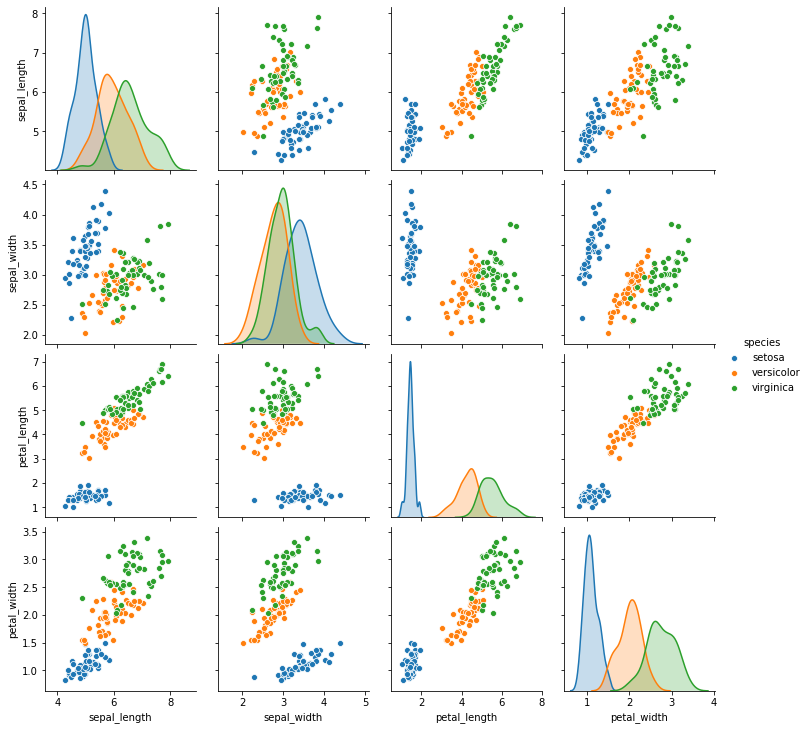

In [159]:
sns.pairplot(iris_dna,hue="species")
plt.show()

In [160]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

## Questions
### Question 1 :
On the iris_dna dataframe, calculate the following linear correlation coefficients :
- petal_width versus petal_length
- sepal_width versus petal_width

In [161]:
print("The total linear correlation coefficient between petal width and petal length is {}.".format(st.pearsonr(iris_dna["petal_length"],iris_dna["petal_width"])[0]))
print("The total linear correlation coefficient between sepal width and petal width is {}.".format(st.pearsonr(iris_dna["petal_width"],iris_dna["sepal_width"])[0]))
print('\n')
for spec in iris_dna["species"].unique():
    print(spec + " : ")
    print("Correlation coefficient between petal width and length is {}.\n".format(st.pearsonr(iris_dna[iris_dna["species"]==spec]["petal_length"],iris_dna[iris_dna["species"]==spec]["petal_width"])[0]))
    print("Correlation coefficient between sepal width and petal width is {}.\n".format(st.pearsonr(iris_dna[iris_dna["species"]==spec]["petal_width"],iris_dna[iris_dna["species"]==spec]["sepal_width"])[0]))

The total linear correlation coefficient between petal width and petal length is 0.9418817573025173.
The total linear correlation coefficient between sepal width and petal width is -0.247971306157846.


setosa : 
Correlation coefficient between petal width and length is 0.36820779015300953.

Correlation coefficient between sepal width and petal width is 0.7531349595699939.

versicolor : 
Correlation coefficient between petal width and length is 0.7871447591900509.

Correlation coefficient between sepal width and petal width is 0.8250525564073544.

virginica : 
Correlation coefficient between petal width and length is 0.35899905262206044.

Correlation coefficient between sepal width and petal width is 0.6850773581335285.



### Question 2:
Comment on the results of question 1 using the 2 scatter diagrams given in the statement.

Next, keep in mind the linear correlation coefficient of sepal_width versus petal_width. This is calculated over the entire iris. When calculating the linear correlation coefficients of these same variables, but separating them by species, the following results are obtained :

    sepal_width as a function of petal_width on iris_setosa: 0.753

    sepal_width as a function of petal_width on iris_virginica: 0.685

    sepal_width as a function of petal_width on iris_versicolor: 0.825



**Answer** : For the width of the petals and their length, we are a correlation very close to 1, so if we increase the length of the petals their width will also increase. However, when analysing this correlation for each species, we can see that this is true especially for versicolor which has a correlation coefficient of 0.78 while the others are around 0.36.  
As regards the width of the sepals and that of the petals, one obtains overall a correlation of 0.24, thus little correlation. However, it happens the opposite phenomenon this time, on the 3 species one has independently a correlation coefficient higher than 0.6.  
So I venture to say that there is a correlation coefficient between the width of the sepals and the width of the petals, but there is no correlation between the length of the petals and their width for the species setosa and virginica.


### Question 3 :
Perform 4 linear regressions (using the method of least squares). We will use the following notation : Y = aX + b + epsilon .

a and b are the reals you need to estimate, epsilon is the error term (you don't have to worry about it), X and Y are 2 variables.

The 4 linear regressions correspond to each of these 4 cases :  
case 1/ X is the variable petal_length and Y is the variable petal_width, on the dataframe iris_dna  
case 2/ X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_setosa  
case 3/ X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_virginica  
case 4/ X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_versicolor  
Note: these are the 4 cases we have been studying since the beginning.

For each of these 4 cases, give the estimates of a and b.

Text(0.5, 1.0, 'Petal width as a function of petal Length for all species')

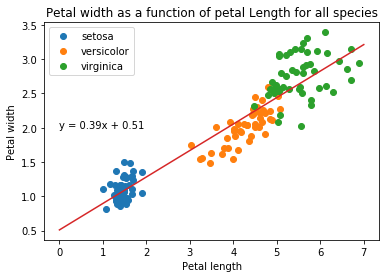

In [162]:
X = iris_dna[['petal_length']]
Y = iris_dna['petal_width']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y,X).fit()
a_tot,b_tot = result.params['petal_length'],result.params['intercept']
fig, ax = plt.subplots()
for spec in iris_dna['species'].unique():
    ax.plot(iris_dna[iris_dna['species']==spec].petal_length,iris_dna[iris_dna['species']==spec].petal_width, "o",label=spec)
ax.plot([a_tot*x + b_tot for x in np.arange(8)])
ax.text(0,2,"y = {}x + {}".format(round(a_tot,2),round(b_tot,2)))
ax.legend(loc='upper left')
ax.set_xlabel("Petal length")
ax.set_ylabel("Petal width")
ax.set_title("Petal width as a function of petal Length for all species")


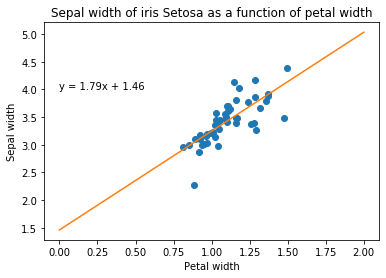

In [163]:
X = iris_setosa[['petal_width']]
Y = iris_setosa['sepal_width']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y,X).fit()
a_set,b_set = result.params['petal_width'],result.params['intercept']
plt.plot(iris_setosa.petal_width,iris_setosa.sepal_width,'o')
plt.plot([a_set*x + b_set for x in np.arange(3)])
plt.text(0,4,"y = {}x + {}".format(round(a_set,2),round(b_set,2)))
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Sepal width of iris Setosa as a function of petal width')
plt.show()

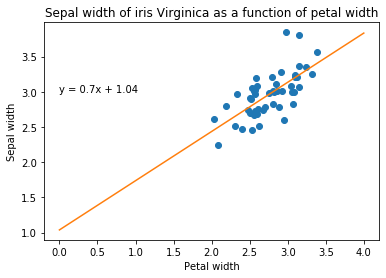

In [164]:
X = iris_virginica[['petal_width']]
Y = iris_virginica['sepal_width']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y,X).fit()
a_vir,b_vir = result.params['petal_width'],result.params['intercept']
plt.plot(iris_virginica.petal_width,iris_virginica.sepal_width,'o')
plt.plot([a_vir*x + b_vir for x in np.arange(5)])
plt.text(0,3,"y = {}x + {}".format(round(a_vir,2),round(b_vir,2)))
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Sepal width of iris Virginica as a function of petal width')
plt.show()

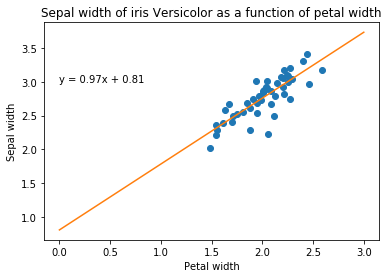

In [165]:
X = iris_versicolor[['petal_width']]
Y = iris_versicolor['sepal_width']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y,X).fit()
a_ver,b_ver = result.params['petal_width'],result.params['intercept']
plt.plot(iris_versicolor.petal_width,iris_versicolor.sepal_width,'o')
plt.plot([a_ver*x + b_ver for x in np.arange(4)])
plt.text(0,3,"y = {}x + {}".format(round(a_ver,2),round(b_ver,2)))
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Sepal width of iris Versicolor as a function of petal width')
plt.show()

### Question 4


In [166]:
coeffs = {
    "cas 1" : {'a': a_tot , 'b':b_tot, 'species':'None'},
    "cas 2" : {'a': a_set , 'b':b_set, 'species':'setosa'},
    "cas 3" : {'a': a_vir , 'b':b_vir, 'species':'virginica'},
    "cas 4" : {'a': a_ver , 'b':b_ver, 'species':'versicolor'},
}

modified_lines = []

for (i,individual) in iris.iterrows(): 
    if pd.isnull(individual["petal_width"]):
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individual["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y 
        modified_lines.append(i)
        print("We added {} to petal_width from petal_length={}.".format(Y,X))
        
    if pd.isnull(individual["sepal_width"]):
        espece = individual["species"]
        X = individual["petal_width"]
        for x in coeffs:
            if coeffs[x]['species']==espece:
                a = coeffs[x]['a']
                b = coeffs[x]['b']
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y
        modified_lines.append(i)
        print("We've completed sepal_width with {} from species:{} and petal_width={}".format(Y,espece,X))
        
print(iris.loc[modified_lines])


We've completed sepal_width with 3.2510181164082854 from species:setosa and petal_width=1.0023435676326218
We added 2.0639904746744127 to petal_width from petal_length=4.027837977207209.
We've completed sepal_width with 3.009714075281927 from species:versicolor and petal_width=2.259954321281721
We've completed sepal_width with 3.360564196480711 from species:virginica and petal_width=3.3218723995908728
     sepal_length  sepal_width  petal_length  petal_width     species
3        4.603747     3.251018      1.480616     1.002344      setosa
53       5.442775     2.340928      4.027838     2.063990  versicolor
61       5.879497     3.009714      4.181942     2.259954  versicolor
100      6.230628     3.360564      6.001908     3.321872   virginica
